## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importando Base de Dados

In [2]:
feData = pd.read_csv('data/ifood-restaurants-february-2021.csv')
noData = pd.read_csv('data/ifood-restaurants-november-2020.csv')


In [3]:
feData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   avatar                  406122 non-null  object 
 2   category                406399 non-null  object 
 3   delivery_fee            406399 non-null  float64
 4   delivery_time           406399 non-null  int64  
 5   distance                406399 non-null  float64
 6   ibge                    406399 non-null  int64  
 7   minimumOrderValue       406399 non-null  float64
 8   name                    406399 non-null  object 
 9   paymentCodes            406397 non-null  object 
 10  price_range             406399 non-null  object 
 11  rating                  406399 non-null  float64
 12  tags                    406399 non-null  object 
 13  url                     406399 non-null  object 
dtypes: bool(1), float64(

## Limpando Dados

Restaurantes que sobreviveram de novembro de 2020 até feveiro de 2021 (não incluiu restaurantes que fecharam antes de novembro de 2020)

In [4]:
data = feData[feData['url'].isin(noData['url'])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317191 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  317191 non-null  bool   
 1   avatar                  316929 non-null  object 
 2   category                317191 non-null  object 
 3   delivery_fee            317191 non-null  float64
 4   delivery_time           317191 non-null  int64  
 5   distance                317191 non-null  float64
 6   ibge                    317191 non-null  int64  
 7   minimumOrderValue       317191 non-null  float64
 8   name                    317191 non-null  object 
 9   paymentCodes            317191 non-null  object 
 10  price_range             317191 non-null  object 
 11  rating                  317191 non-null  float64
 12  tags                    317191 non-null  object 
 13  url                     317191 non-null  object 
dtypes: bool(1), float64(

<AxesSubplot: ylabel='Frequency'>

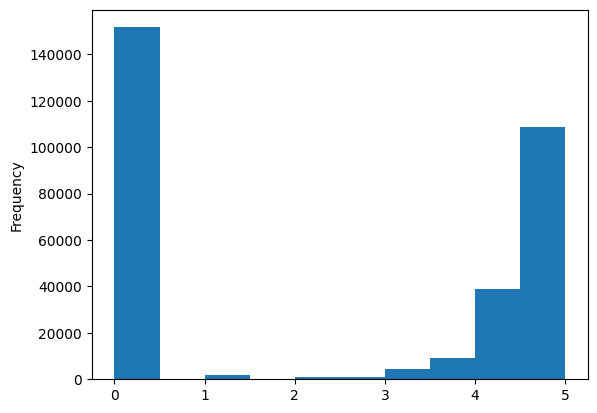

In [21]:
#plot 'rating' distribuition 
data['rating'].plot.hist(bins=10)

Removendo restaurantes com avaliações iguais a **0** ou iguais a **5**

In [5]:
#removendo restaurantes com rating == 0 
data = data[(data['rating'] != 0)&(data['rating'] != 5)]

<AxesSubplot: ylabel='Frequency'>

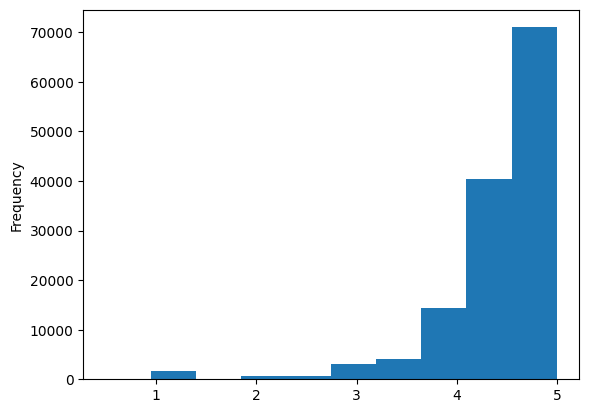

In [6]:
data['rating'].plot.hist(bins=10)

<AxesSubplot: >

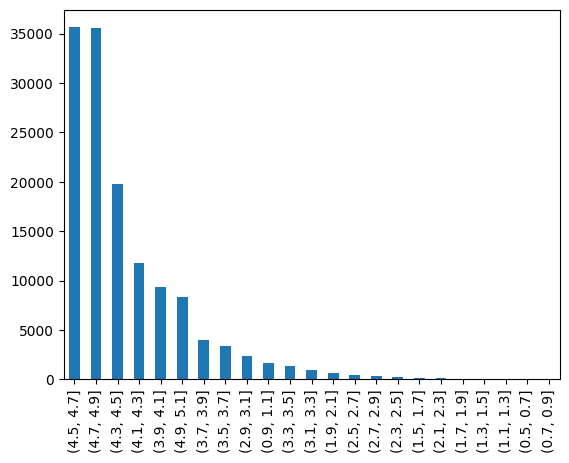

In [7]:
data['rating_bin'] = pd.cut(data['rating'], np.arange(0.5, 5.2, 0.2))
data['rating_bin'].value_counts().plot.bar()

Analisando o gráfico, podemos ver que as notas se aproximam, no geral, bastante de 5, por isso, para que possamos analisar as características dos restaurantes mais bem avaliados, podemos divdir o dataset em dois grupos. O grupo elite, com as maiores notas, deve conter os restaurantes com nota mairo que 4,7. O grupo não-elite, com as menores notas, deve conter os restaurantes com nota menor que 4,7.

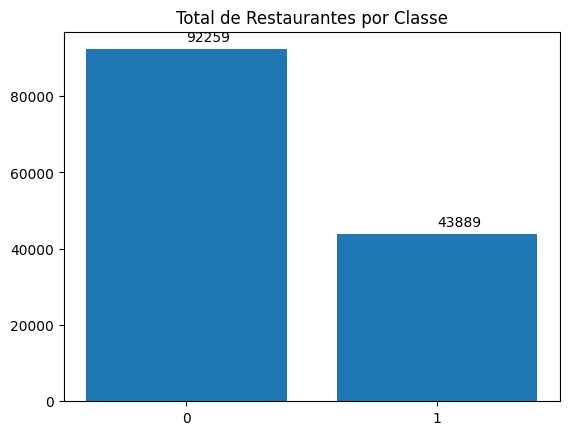

In [8]:
# at rating bin, if rating >= 4.5, rating_max = 1, else rating_max = 0
data['rating_max'] = data['rating'].apply(lambda x: 1 if x >= 4.7 else 0)


# Count the occurrences of each class
class_counts = data['rating_max'].value_counts()

# Create the bar plot
plt.bar(class_counts.index, class_counts.values)

# Annotate each bar with the count of the class
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 2000, str(v))

plt.xticks(class_counts.index, ['0', '1'])
plt.title('Total de Restaurantes por Classe')
plt.show()

O que um restaurante nota > 4.7 precisa ter? 

In [9]:
elite = data[data['rating_max'] == 1]
not_elite = data[data['rating_max'] == 0]

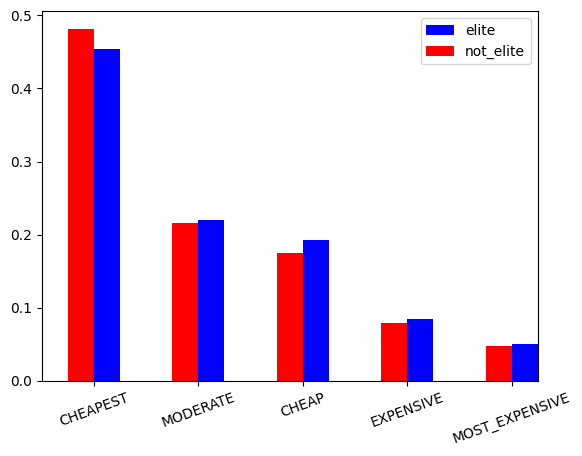

In [10]:
#plotando a distribuição de preços dos restaurantes com rating >= 4.7 e < 4.7 com dados normalizados para preservar a proporção 
fig, ax = plt.subplots()
(elite['price_range'].value_counts()/elite['price_range'].count()).plot.bar(ax=ax, color='blue', position=0, width=0.25, label='elite')
(not_elite['price_range'].value_counts()/not_elite['price_range'].count()).plot.bar(ax=ax, color='red', position=1, width=0.25, label='not_elite')
plt.xticks(rotation=20)
plt.legend()
plt.show()

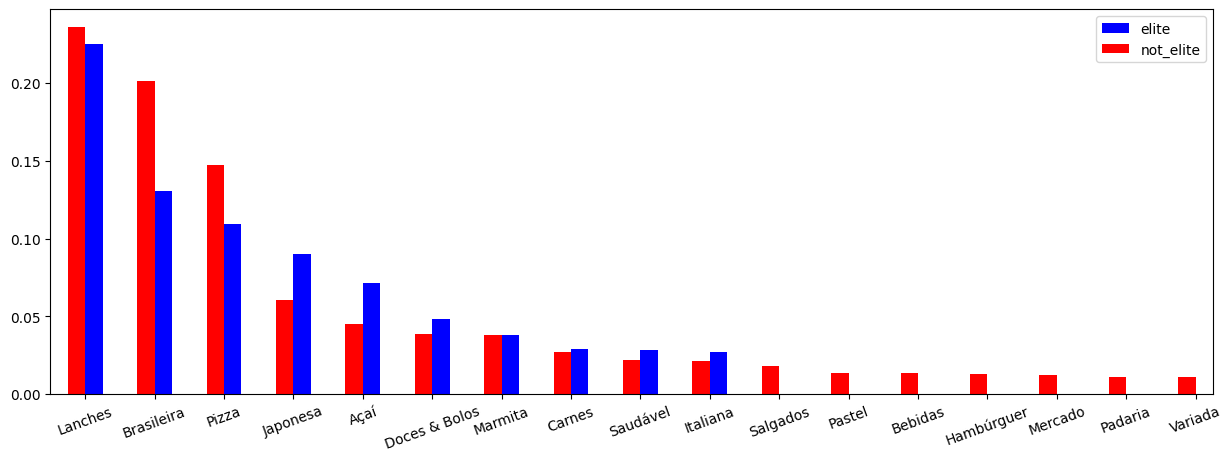

In [11]:
#plot category of elite vs not elite restaurants for categories with more than 1000 restaurants
fig, ax = plt.subplots(figsize=(15,5))
(elite['category'].value_counts()[elite['category'].value_counts() > 1000]/elite['category'].count()).plot.bar(ax=ax, color='blue', position=0, width=0.25, label='elite')
(not_elite['category'].value_counts()[not_elite['category'].value_counts() > 1000]/not_elite['category'].count()).plot.bar(ax=ax, color='red', position=1, width=0.25, label='not_elite')
plt.xticks(rotation=20)

#increase plot size to see all categories 
plt.legend()
plt.show()

In [12]:
print(elite['delivery_time'].mean())
print(not_elite['delivery_time'].mean())

42.68723370320581
47.392731332444534


In [13]:
print(elite['delivery_fee'].mean())
print(not_elite['delivery_fee'].mean())

7.124221331085237
6.649136127640664


In [14]:
print(elite['minimumOrderValue'].mean())
print(not_elite['minimumOrderValue'].mean())

15.352705005810112
16.95895327285143


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136148 entries, 255 to 406398
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   availableForScheduling  136148 non-null  bool    
 1   avatar                  136136 non-null  object  
 2   category                136148 non-null  object  
 3   delivery_fee            136148 non-null  float64 
 4   delivery_time           136148 non-null  int64   
 5   distance                136148 non-null  float64 
 6   ibge                    136148 non-null  int64   
 7   minimumOrderValue       136148 non-null  float64 
 8   name                    136148 non-null  object  
 9   paymentCodes            136148 non-null  object  
 10  price_range             136148 non-null  object  
 11  rating                  136148 non-null  float64 
 12  tags                    136148 non-null  object  
 13  url                     136148 non-null  object  
 14  ra

In [23]:
def price_range_tranformation(price_range):
    if price_range == 'CHEAPEST':
        return 0
    if price_range == 'CHEAP':
        return 1
    if price_range == 'MODERATE':
        return 2
    if price_range == 'EXPENSIVE':
        return 3
    if price_range == 'MOST_EXPENSIVE':
        return 4

brFood = data[data['category'] == 'Brasileira']


brFood['scheduling'] = brFood['availableForScheduling'].apply(lambda x: 0 if x == 'False' else 1)
brFood['price'] = brFood['price_range'].apply(price_range_tranformation)

brFood = brFood.drop(brFood.columns[[0,1,2,8,9,10,12,13,14,15]], axis=1)
brFood

/tmp/ipykernel_61871/4037142273.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brFood['scheduling'] = brFood['availableForScheduling'].apply(lambda x: 0 if x == 'False' else 1)
/tmp/ipykernel_61871/4037142273.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brFood['price'] = brFood['price_range'].apply(price_range_tranformation)


,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,rating,scheduling,price
2063,9.99,42,2.48,3550308,20.0,3.44737,1,1
2064,0.00,55,3.59,3550308,20.0,3.44444,1,0
2065,0.00,45,4.13,3550308,0.0,3.43860,1,0
2067,5.99,32,2.16,3550308,20.0,3.42857,1,0
2074,0.00,50,4.13,3550308,0.0,3.34177,1,0
...,...,...,...,...,...,...,...,...
406217,0.00,30,0.94,3306305,20.0,3.44444,1,0
406295,4.00,80,4.30,2307304,12.0,4.39080,1,0
406354,12.00,60,3.33,4309209,0.0,4.50000,1,2
406371,7.00,90,2.93,4309209,15.0,4.92000,1,0


<AxesSubplot: >

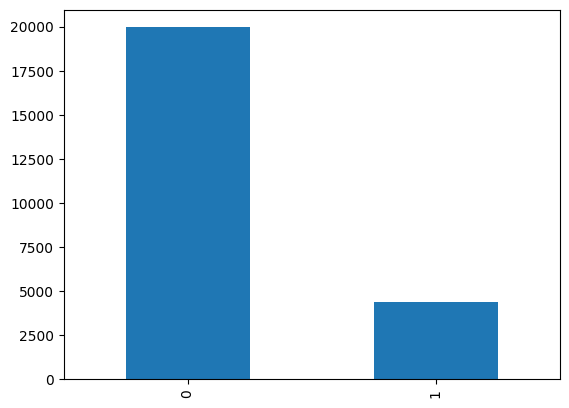

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=45).fit(brFood)
y_kmeans = kmeans.predict(brFood)

pd.Series(y_kmeans).value_counts().plot(kind='bar')

## Analisando as logos



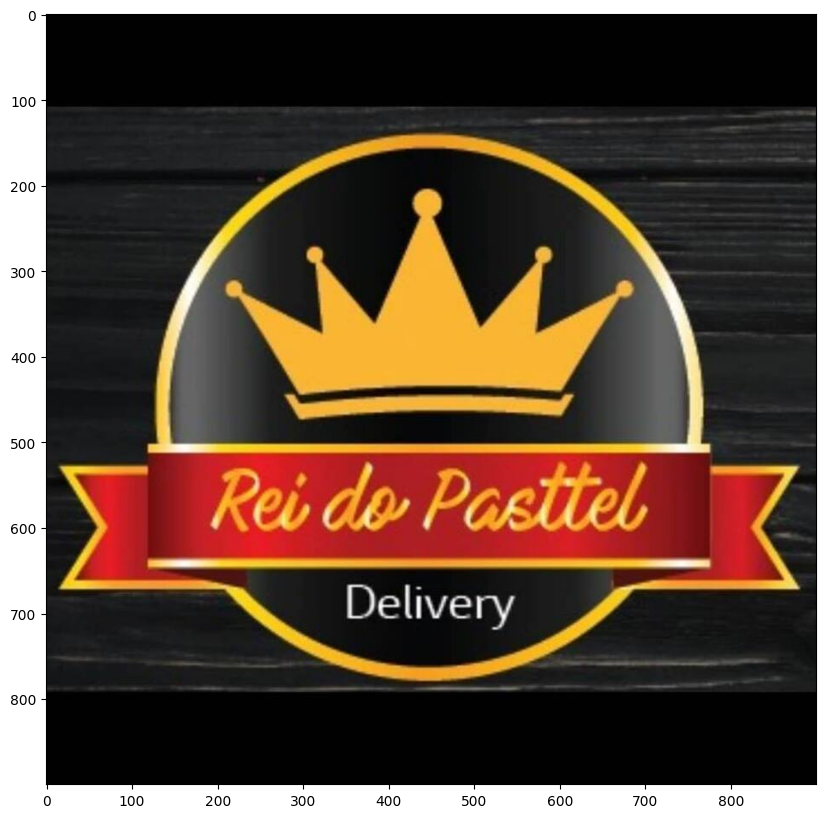

In [110]:
sample = data.sample(1)['avatar']
#get image from url and plot it 
from PIL import Image
import urllib.request
import matplotlib.pyplot as plt
pixels = 0
image = 0
url = sample.values[0]
with urllib.request.urlopen(url) as url:
    image = Image.open(url)
    # plt.imshow(image)
    
    pixels = image.getdata()


# for all the data in elite, get the image and calculate the average color 
# for each image, calculate the average color

    




### Color Quantization usando K-means


In [116]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.ndimage import gaussian_filter



#reduce image size to 32 x 32 
image = image.resize((160, 160)) 
pixels = image.getdata()
# Convert the pixels to a numpy array
pixels_array = np.array(pixels)



# Use the KMeans algorithm to cluster the pixels into 10 clusters
kmeans = KMeans(n_clusters=3).fit(pixels_array)


# Create a dictionary to store the frequencies of the cluster labels
cluster_freq = {}

# Iterate over the cluster labels and count the frequencies
for label in kmeans.labels_:
    if label not in cluster_freq:
        cluster_freq[label] = 1
    else:
        cluster_freq[label] += 1

# Sort the dictionary by values in descending order
sorted_clusters = sorted(cluster_freq.items(), key=lambda x: x[1], reverse=True)

background = sorted_clusters[0]
# Get the top three cluster labels but igore the first one, wich represents the background
top_three = sorted_clusters[:3]

# Print the top three cluster labels
for label, freq in top_three:
    print(label, freq)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# #background color 
# background_color = cluster_centers[background[0]].astype(int)


# Get the dominant color for each cluster
for label, freq in top_three:
    dominant_color = cluster_centers[label].astype(int)
 

0 18016
2 4231
1 3353


In [147]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
from typing import Tuple

def extract_dominant_colors(image_path: str, n_clusters: int=3, resize: Tuple[int, int]=(160, 160)):
    # Open the image
    image = Image.open(image_path)
    # Resize the image
    image = image.resize(resize)
    # Get the pixels from the image
    pixels = image.getdata()
    # Convert the pixels to a numpy array
    pixels_array = np.array(pixels)
    # Use the KMeans algorithm to cluster the pixels
    kmeans = KMeans(n_clusters=n_clusters).fit(pixels_array)
    # Create a dictionary to store the frequencies of the cluster labels
    cluster_freq = {}
    # Iterate over the cluster labels and count the frequencies
    for label in kmeans.labels_:
        if label not in cluster_freq:
            cluster_freq[label] = 1
        else:
            cluster_freq[label] += 1
    # Sort the dictionary by values in descending order
    sorted_clusters = sorted(cluster_freq.items(), key=lambda x: x[1], reverse=True)
    # Get the top three cluster labels (ignoring the first one, which represents the background)
    top_three = sorted_clusters[:3]
    # Print the top three cluster labels
    for label, freq in top_three:
        print(label, freq)
    # Get the cluster centers
    cluster_centers = kmeans.cluster_centers_
    # Get the dominant color for each cluster
    dominant_colors = []
    for label, freq in top_three:
        dominant_colors.append(cluster_centers[label].astype(int))
    return dominant_colors

In [142]:
from typing import Tuple, Dict
from colormath.color_diff import delta_e_cie2000
from colormath.color_conversions import convert_color
from colormath.color_objects import sRGBColor

def find_closest_color(colors: Dict[str, Tuple[int, int, int]], target_rgb: Tuple[int, int, int]) -> str:
    closest_color = ""
    closest_distance = float("inf")
    for color_name, color_rgb in colors.items():
        # Convert RGB to L*a*b* color space
        color_rgb_obj = sRGBColor(*color_rgb, is_upscaled=True)
        target_rgb_obj = sRGBColor(*target_rgb, is_upscaled=True)

        color_lab = convert_color(color_rgb_obj, LabColor)
        target_lab = convert_color(target_rgb_obj, LabColor)

        # Calculate the CIEDE2000 color difference
        distance = delta_e_cie2000(color_lab, target_lab)

        # Update the closest color and distance if a closer color is found
        if distance < closest_distance:
            closest_color_rgb = color_rgb
            closest_color = color_name
            closest_distance = distance

        
    return closest_color, closest_color_rgb

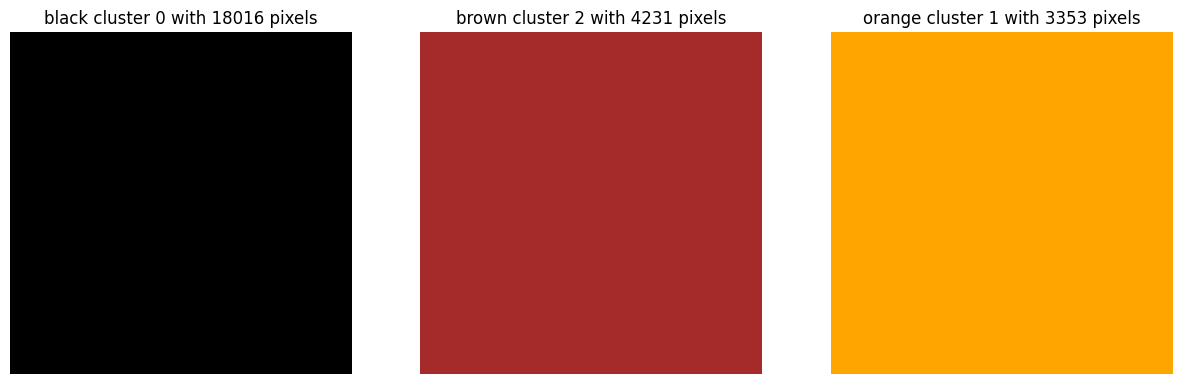

In [149]:


#dominant colors
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, (label, freq) in enumerate(top_three):
    dominant_color = cluster_centers[label].astype(int)
    ax[i].imshow([[find_closest_color(colors,dominant_color)[1]]])
    ax[i].set_title(f'{find_closest_color(colors,dominant_color)[0]} cluster {label} with {freq} pixels')
    ax[i].axis('off')  
plt.show()


## Captura da Quantidade de Avaliações por Restaurante

In [10]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

totalAvList = []

for i in range(0, len(noData['url'])):
    url = noData['url'][i]

    nav = webdriver.Chrome(ChromeDriverManager().install())
    nav.get(url)

    ##se o site ao estiver inativo
    if not nav.title == 'Delivery de Comida e Mercado - iFood':
        nav.find_element(By.CLASS_NAME,'restaurant-rating__rating-wrapper').click()
        # content.click()

        content = nav.find_element(By.CLASS_NAME, 'rating-counter__total')

        totalAv = content.text
        totalAv = totalAv.split()
        totalAvList.append(totalAv[0])
        # print(totalAv[0])
    else:
        totalAvList.append(0)

    nav.quit()


# url = noData['url'][0]

# nav = webdriver.Chrome(ChromeDriverManager().install())
# nav.get(url)

# ##se o site ao estiver inativo
# if not nav.title == 'Delivery de Comida e Mercado - iFood':
#     nav.find_element(By.CLASS_NAME,'restaurant-rating__rating-wrapper').click()
#     # content.click()

#     content = nav.find_element(By.CLASS_NAME, 'rating-counter__total')

#     totalAv = content.text
#     totalAv = totalAv.split()
#     totalAvList.append(totalAv[0])
#     print(totalAv[0])


# nav.quit()

# print(content.text)

ModuleNotFoundError: No module named 'webdriver_manager'

In [9]:
totalAvList

['40', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]